## **1. 데이터&라이브러리 불러오기**

In [1]:
import pandas as pd
import os
import shutil

In [2]:
%cd /root

/root


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 드라이브 내에 압축을 풀면 공간이 부족하기 때문에 root에서 압축 풀기
%cd /root

/root


In [6]:
# !unzip -q "/content/drive/MyDrive/대회/데이터 크리에이터 캠프/Data/고등부_데이터셋.zip" -d .
# 압축 데이터의 크기가 클 경우 아래와 같은 방법을 사용해야한다.
!zip -FFv "/content/drive/MyDrive/데이터 크리에이터 캠프/Data/Data_1(초기).zip" --out data.zip
!unzip data.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5499.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img55.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img550.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5500.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5501.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5502.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5503.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5504.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5505.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5506.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5507.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5508.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5509.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img551.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5510.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5511.json  
  inflating: ░э╡ю║╬ ╡е└╠┼═╝┬/Item-Parse_f/img5512.json  

In [8]:
%mv '/root/░э╡ю║╬ ╡е└╠┼═╝┬' '/root/data'

In [17]:
from glob import glob

img_list_len = len(os.listdir("/root/data/Item-Image"))
parse_list_len = len(os.listdir("/root/data/Item-Parse_f"))

print(img_list_len)
print(parse_list_len)

30000
30000


3만개의 데이터를 확인할 수 있다.

## **2. 데이터 라벨값 별 나누기**

데이터 설명을 살펴보면 데이터 라벨값의 종류는 아래와 같다.
- tops(상의)
- bottoms(하의)
- cap_and_hat(모자)
- outerwear(겉옷)
- shoes(신발)

### **2.1 json 파일 불러오기**

In [20]:
# json 파일을 데이터프레임으로 불러오기
temp_df = pd.read_json("/root/data/Item-Parse_f/img0.json")

# 라벨값 불러오기
temp_df['category_name']['category_id']

'tops'

In [21]:
os.mkdir('/content/Data_2(라벨별_분류)') # 데이터 폴더
os.mkdir('/content/Data_2(라벨별_분류)/tops') # 상의 데이터 폴더
os.mkdir('/content/Data_2(라벨별_분류)/bottoms') # 하의 데이터 폴더
os.mkdir('/content/Data_2(라벨별_분류)/cap_and_hat') # 모자 데이터 폴더
os.mkdir('/content/Data_2(라벨별_분류)/outerwear') # 겉옷 데이터 폴더
os.mkdir('/content/Data_2(라벨별_분류)/shoes') # 신발 데이터 폴더

In [27]:
%cd /root/data/Item-Parse_f

/root/data/Item-Parse_f


In [29]:
# 라벨값 기준으로 파일 분류하기
for i in os.listdir('/root/data/Item-Parse_f/'):    
  df = pd.read_json(i) 

  num = i[3:]
  num = num.replace('.json', '')  

  # 파일을 각 라벨값 폴더로 옮기기
  if df['category_name']['category_id'] == 'tops':
    file_name = 'img' + str(num) + '.jpg'
    shutil.copy('/root/data/Item-Image/' + file_name, '/content/Data_2(라벨별_분류)/tops/' + file_name) 

  elif df['category_name']['category_id'] == 'bottoms':
    file_name = 'img' + str(num) + '.jpg'
    shutil.copy('/root/data/Item-Image/' + file_name, '/content/Data_2(라벨별_분류)/bottoms/' + file_name)

  elif df['category_name']['category_id'] == 'cap_and_hat':
    file_name = 'img' + str(num) + '.jpg'
    shutil.copy('/root/data/Item-Image/' + file_name, '/content/Data_2(라벨별_분류)/cap_and_hat/' + file_name)

  elif df['category_name']['category_id'] == 'outerwear':
    file_name = 'img' + str(num) + '.jpg'
    shutil.copy('/root/data/Item-Image/' + file_name, '/content/Data_2(라벨별_분류)/outerwear/' + file_name)

  elif df['category_name']['category_id'] == 'shoes':
    file_name = 'img' + str(num) + '.jpg'
    shutil.copy('/root/data/Item-Image/' + file_name, '/content/Data_2(라벨별_분류)/shoes/' + file_name)

In [30]:
# 잘 불러왔는지 확인

bottoms_cnt = len(os.listdir("/content/Data_2(라벨별_분류)/bottoms"))
capandhat_cnt = len(os.listdir("/content/Data_2(라벨별_분류)/cap_and_hat"))
outerwear_cnt = len(os.listdir("/content/Data_2(라벨별_분류)/outerwear"))
shoes_cnt = len(os.listdir("/content/Data_2(라벨별_분류)/shoes"))
tops_cnt = len(os.listdir("/content/Data_2(라벨별_분류)/tops"))

print('bottoms_cnt :', bottoms_cnt)
print('cap_and_hat :', capandhat_cnt)
print('outerwear : ', outerwear_cnt)
print('shoes_cnt :', shoes_cnt)
print('tops_cnt :', tops_cnt)
print('All :', bottoms_cnt + capandhat_cnt + outerwear_cnt + shoes_cnt + tops_cnt)

bottoms_cnt : 6424
cap_and_hat : 196
outerwear :  4606
shoes_cnt : 424
tops_cnt : 18350
All : 30000


그냥 폴더로 구글 드라이브에 저장시 몇 개 데이터가 빠지는 문제가 발생해서 압축해서 저장해줬다.

In [32]:
!zip -r '/content/drive/MyDrive/대회/데이터 크리에이터 캠프/Data/Data_2(라벨별_분류).zip' '/content/Data_2(라벨별_분류)/'
# 폴더를 압축하기 위해서는 r 옵션을 사용해야한다.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
updating: content/Data_2(라벨별_분류)/bottoms/img28802.jpg (deflated 10%)
updating: content/Data_2(라벨별_분류)/bottoms/img8052.jpg (deflated 4%)
updating: content/Data_2(라벨별_분류)/bottoms/img27927.jpg (deflated 6%)
updating: content/Data_2(라벨별_분류)/bottoms/img13671.jpg (deflated 9%)
updating: content/Data_2(라벨별_분류)/bottoms/img19845.jpg (deflated 9%)
updating: content/Data_2(라벨별_분류)/bottoms/img22978.jpg (deflated 4%)
updating: content/Data_2(라벨별_분류)/bottoms/img22452.jpg (deflated 5%)
updating: content/Data_2(라벨별_분류)/bottoms/img6804.jpg (deflated 6%)
updating: content/Data_2(라벨별_분류)/bottoms/img28068.jpg (deflated 5%)
updating: content/Data_2(라벨별_분류)/bottoms/img17842.jpg (deflated 7%)
updating: content/Data_2(라벨별_분류)/bottoms/img19143.jpg (deflated 6%)
updating: content/Data_2(라벨별_분류)/bottoms/img20855.jpg (deflated 6%)
updating: content/Data_2(라벨별_분류)/bottoms/img17688.jpg (deflated 4%)
updating: content/Data_2(라벨별_분류)/bottoms/img4737.jpg (deflated 5%)
updating: cont

총 3만개의 데이터가 있는 것을 보면 잘 분류된 것을 확인할 수 있다.

**미션 1-1 (Training 데이터 셋의 데이터를 살펴보고 라벨 종류는 무엇이 있고, 각 라벨의 개수를
구하시오) 완료**

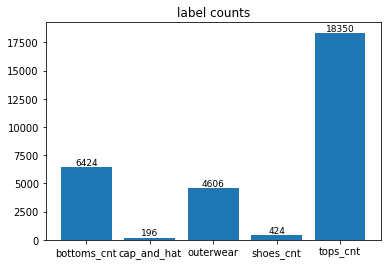

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
labels = ['bottoms_cnt', 'cap_and_hat', 'outerwear', 'shoes_cnt', 'tops_cnt']
values = [bottoms_cnt, capandhat_cnt, outerwear_cnt, shoes_cnt, tops_cnt]

plt.bar(x, values)
plt.xticks(x, labels)

for i, v in enumerate(x):
    plt.text(v, values[i], str(values[i]),
             fontsize=9,             
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title('label counts')
plt.show()

클래스 불균형이 존재하는 것을 확인할 수 있다.

중복 데이터는 존재하지 않는다고 한다.